## Gradient Descent Algorithm for simple Linear Regression


##### In gradient descent, we aim to minimize the loss function. As you might know, the loss fuction in linear regression is usually the mean_squared_error: $$
\text{J(w) = MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

##### If we calculate the gradient of J(w):



Gradient with respect to the bias \(w_0\):

$$
\frac{\partial \text{J(w)}}{\partial w_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

Gradient with respect to the weight \(w_1\):

$$
\frac{\partial \text{J(w)}}{\partial w_1} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_i
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Optimizer:
    def __init__(self, w0, w1):
        self.w = np.array([w0, w1], dtype=float)
        self.ws = [] 
        self.Js = []

    def J(self, w, x, y):
        return np.mean((y - (w[1]*x + w[0]))**2)

    def gradient(self, w, x, y):
        w0_grad = -2 * np.sum(y - (w[1]*x + w[0]))
        w1_grad = -2 * np.sum((y - (w[1]*x + w[0])) * x)
        return np.array([w0_grad, w1_grad])

    def gradient_descent(self, x, y, learning_rate=0.01, num_iterations=100):
        for i in range(num_iterations):
            grad = self.gradient(self.w, x, y) / len(y)
            self.ws.append(self.w.copy())           
            self.Js.append(self.J(self.w, x, y))  
            self.w = self.w - learning_rate * grad
        return self.w

    def plot(self, x, y, step=10):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

        ax1.scatter(x, y, color="red", label="Data")
        xs = np.linspace(min(x)-1, max(x)+1, 100)

        for w in self.ws[::step]:
            ax1.plot(xs, w[1] * xs + w[0], alpha=0.2, color="blue")

        ax1.plot(xs, self.ws[0][1] * xs + self.ws[0][0], 
                 color="green", linestyle="--", label="Start")
        ax1.plot(xs, self.ws[-1][1] * xs + self.ws[-1][0], 
                 color="black", linewidth=2, label="Final fit")
        ax1.set_title(f"Line progression (every {step} iteration{'s' if step>1 else ''})")
        ax1.legend()

        ax2.plot(range(len(self.Js)), self.Js, color="purple")
        ax2.set_xlabel("Iteration")
        ax2.set_ylabel("Loss (MSE)")
        ax2.set_title("Convergence of Loss")
        plt.show()


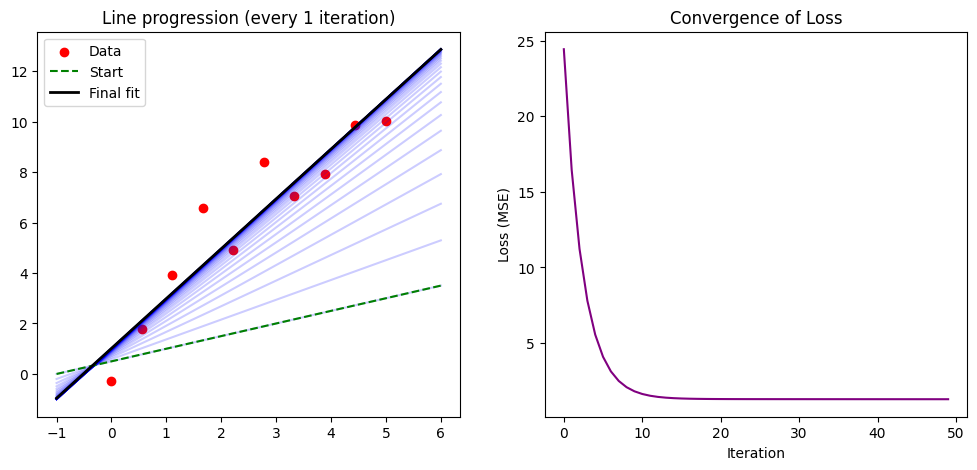

In [2]:
x_data = np.linspace(0, 5, 10)
noise = 1.1 * np.random.normal(size=len(x_data))
y_data = 2 * x_data + 1 +  noise

# Setting initial parameters randomly
a = Optimizer(0.5, 0.5)
a.gradient_descent(x_data, y_data, learning_rate=0.01, num_iterations=50)
a.plot(x_data, y_data, step = 1)
